# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [134]:
#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [135]:
#Cargamos dataset a utilizar
df_car = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)
df_car.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Análisis exploratorio de datos

In [136]:
#Analizamos el shape del objeto
df_car.shape

(1728, 7)

In [137]:
#Como podemos observar vamos a renombrar las columnas de manera correcta
col_names = ['buyin', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df_car.columns = col_names

df_car.head()

,buyin,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [138]:
#Visualizamos los tipos de datos
df_car.dtypes

buyin       object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Primer resumen de los datos:
* Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
* Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.
* La clase es la variable de destino o target.

In [139]:
# Exploremos un poco mas la variable target
df_car['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [140]:
#Verificamos valores missings
df_car.isnull().sum()

buyin       0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

El dataset no contiene valores faltantes

## Procesamiento de datos

In [141]:
#Separamos en X e y

# Variables predictoras
X = df_car.drop(['class'], axis=1)

# Variable target
y = df_car['class']

In [142]:
# Variables features
X.head()

,buyin,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [143]:
# Variable predictora
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

In [144]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

El 42 es una "semilla". Su principal razón es para que si quieres replicar tu código, te salgan los mismos resultados. ¿Por qué? Porque cuando separa tus datos entre datos de entrenamiento y datos de prueba, lo hace de una manera aleatoria, entonces si vuelves a ejecutar el código sin una semilla, cada vez te separará los datos de maneras distintas. En cambio, todas las veces que lo haga con la semilla "42", lo hará igual. Entonces el número de la semilla es irrelevante, podría ser cualquiera que tú quieras (00000, 42, 3, etc.), lo importante es que si usas el mismo número, tendrás los mismos resultados

In [145]:
#Veamos que obtuvimos
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [146]:
y_train.shape, y_test.shape

((1209,), (519,))

In [147]:
#Veamos que tenemos. Por ejemplo, en X_train
X_train.head()

,buyin,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [148]:
X_train.dtypes

buyin       object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

## Entrenamiento de modelo de clasificación con árbol de decisión

Para convertir variables object a categóricas, puedes usar cualquiera de las tres opciones:

- **OrdinalEncoder** es una buena opción si tus variables tienen un orden natural. Por ejemplo, si tienes una variable “tamaño” con valores “pequeño”, “mediano” y “grande”, puedes usar OrdinalEncoder para asignar valores numéricos a cada uno de ellos en función de su orden natural.

- **OneHotEncoder** es una buena opción si tus variables no tienen un orden natural. Por ejemplo, si tienes una variable “color” con valores “rojo”, “verde” y “azul”, no hay un orden natural entre ellos. En este caso, OneHotEncoder creará una columna separada para cada valor posible y asignará un valor binario (0 o 1) a cada columna.

- **category_encoder** es otra biblioteca que puedes usar para codificar variables categóricas. Tiene varias opciones diferentes para codificar variables categóricas, incluyendo OrdinalEncoder , OneHotEncoder, BinaryEncoder, BaseNEncoder, HashingEncoder.

### Convertir con category_encoder

In [149]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion con category_enconder
import category_encoders as ce  # debemos instalar esta libreria: pip install category_encoders

# Convertimos las variables predictoras
encoder = ce.OrdinalEncoder(cols=X_train.columns)

# Aplicamos las variables transformadas a los datos de entrenamiento
X_train1 = encoder.fit_transform(X_train)

# Aplicamos las variables transformadas a los datos de prueba
X_test1 = encoder.transform(X_test)


fit_transform y transform son dos métodos que se utilizan en el contexto de la transformación de datos en aprendizaje automático. En particular, cuando hablamos de OrdinalEncoder, estos métodos tienen funciones específicas:

**fit_transform**: Este método se utiliza para ajustar el codificador a los datos de entrada y transformarlos simultáneamente. Durante el ajuste (fit), el codificador aprende los diferentes valores únicos presentes en la característica y asigna a cada uno un número entero único. Luego, estos valores se utilizan para transformar los datos de entrada, es decir, cada valor único se reemplaza por su correspondiente número entero asignado.

**transform**: Este método se utiliza únicamente para transformar los datos de entrada utilizando las asignaciones aprendidas durante el ajuste (fit). Si intentas usar transform sin haber ajustado el codificador previamente (sin haber llamado fit), obtendrás un error.

Entonces, la diferencia principal radica en que fit_transform realiza tanto el ajuste como la transformación de los datos, mientras que transform solo realiza la transformación, utilizando los parámetros aprendidos durante el ajuste.

In [150]:
#Verificamos la transformacion
X_train1.head()

,buyin,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [151]:
X_test1.head()

,buyin,maint,doors,persons,lug_boot,safety
599,2,2,3,3,3,1
1201,1,4,4,1,3,3
628,2,2,1,3,1,3
1498,3,2,1,1,3,3
1263,1,4,3,2,3,2


### Convertir con Ordinal Encoder 

Otra forma de transformar los Datos a Numericos...

In [152]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

X_train2 = pd.DataFrame(ord_enc.fit_transform(X_train), columns=X_train.columns)

X_test2 = pd.DataFrame(ord_enc.transform(X_test), columns=X_test.columns)

In [153]:
X_train2.head()

,buyin,maint,doors,persons,lug_boot,safety
0,2.0,2.0,3.0,1.0,0.0,0.0
1,0.0,0.0,1.0,2.0,2.0,1.0
2,1.0,2.0,1.0,1.0,1.0,2.0
3,2.0,2.0,3.0,0.0,0.0,0.0
4,2.0,0.0,2.0,0.0,0.0,2.0


In [154]:
X_test2.head()

,buyin,maint,doors,persons,lug_boot,safety
0,0.0,0.0,2.0,0.0,1.0,0.0
1,2.0,1.0,0.0,1.0,1.0,2.0
2,0.0,0.0,3.0,0.0,0.0,2.0
3,1.0,0.0,3.0,1.0,1.0,2.0
4,2.0,1.0,2.0,2.0,1.0,1.0


### Entrenamiento del modelo

In [155]:
#Importar árbol de decisión
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=42)

Hemos definido un nivel de profundidad de 2 debido a que tenemos pocos datos. Recordar que este algortimo a medida que crece en profundidad tiende al overfitting. Con cada 5000 registros podemos aumentar la profundidad en una unidad

In [156]:
#Entrenamiento
tree.fit(X_train1, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [157]:
#Calculo de las predicciones en Train y Test
y_train_pred_tree =  tree.predict(X_train1)
y_test_pred_tree =  tree.predict(X_test1)

In [158]:
# mostramos las predicciones
y_train_pred_tree

array(['acc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

## Evaluación de modelo de clasificación con árbol de decisión

In [159]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

#Calculo el accuracy en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('El accuracy en train es: ', train_accuracy_tree)
print('El accuracy en train es: ', test_accuracy_tree)

El accuracy en train es:  0.7733664185277088
El accuracy en train es:  0.7591522157996147


Ambos accuracy son similares entre si lo cual es positivo para entender la performance del modelo!

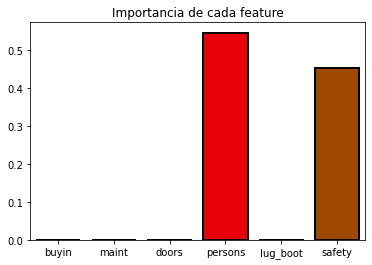

In [160]:
#Verificamos el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada feature');

Las variables persons y safety son las mas relevantes para la variable target

### Obteniendo metricas del modelo

In [161]:
import sklearn.metrics as metrics

# funcion para calcular las metricas del modelo
def metrics_model(y_test, y_test_pred_tree):

    precision = metrics.precision_score(y_test, y_test_pred_tree, average='macro')

    recall = metrics.recall_score(y_test, y_test_pred_tree, average='macro')

    accuracy = metrics.accuracy_score(y_test, y_test_pred_tree)

    f1_score = metrics.f1_score(y_test, y_test_pred_tree, average='macro')

    print('Precision: ',precision)
    print('Recall: ',recall)
    print('Accuracy: ',accuracy)
    print('F1 Score: ',f1_score)

In [162]:
print('Metricas en Train')
metrics_model(y_train, y_train_pred_tree)
print('===============================')
print('Metricas en test')
metrics_model(y_test, y_test_pred_tree)

Metricas en Train
Precision:  0.3450854700854701
Recall:  0.3693785520138374
Accuracy:  0.7733664185277088
F1 Score:  0.3567215781980883
Metricas en test
Precision:  0.334873476417594
Recall:  0.35609790739513303
Accuracy:  0.7591522157996147
F1 Score:  0.3444280388110413


/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Debido al sesgo que hay en los datos, debemos evaluar otras metricas para ver el contraste entre ambos resultados y no confiarnos solo de accuracy

### Matriz de confusion

array([[147,   0, 119,   0],
       [ 21,   0,  29,   0],
       [ 64,   0, 788,   0],
       [ 41,   0,   0,   0]])

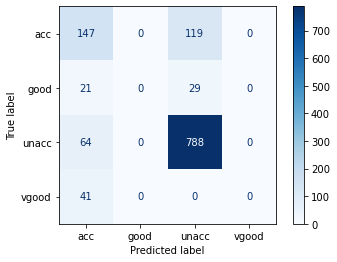

In [163]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(
    y_true=y_train, # Y en train
    y_pred=y_train_pred_tree, # Y predicho en train.
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.confusion_matrix

In [164]:
# Resumen de las metricas
from sklearn.metrics import classification_report

target_names = y_train.unique()
print(classification_report(y_train, y_train_pred_tree, target_names=target_names))

              precision    recall  f1-score   support

       vgood       0.54      0.55      0.55       266
       unacc       0.00      0.00      0.00        50
         acc       0.84      0.92      0.88       852
        good       0.00      0.00      0.00        41

    accuracy                           0.77      1209
   macro avg       0.35      0.37      0.36      1209
weighted avg       0.71      0.77      0.74      1209



/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

## Seleccion de variables y entrenamiento del modelo

In [165]:
# reeligiendo variables predictoras
X_2 = df_car.drop(['class','buyin','maint','doors','lug_boot'], axis=1)

# Variable objetivo
y_2 = df_car['class']

In [166]:
# dividimos los datos y colocamos otra semilla para que no tome los mismos datos
#30% para test y 70% para train
X_train_N, X_test_N, y_train_N, y_test_N = train_test_split(X_2,y_2,test_size=0.30, random_state=00000)

print('Forma grupo entrenamiento: ',X_train_N.shape, X_test.shape)
print('Forma grupo prueba: ',y_train_N.shape, y_test.shape)

Forma grupo entrenamiento:  (1209, 2) (519, 6)
Forma grupo prueba:  (1209,) (519,)


In [167]:
# convertir en variables numericas con OrdinalEncoder

# Convertimos las variables predictoras
encoder = ce.OrdinalEncoder(cols=X_train_N.columns)

# Aplicamos las variables transformadas a los datos de entrenamiento
X_train_N = encoder.fit_transform(X_train_N)

# Aplicamos las variables transformadas a los datos de prueba
X_test_N = encoder.transform(X_test_N)

In [168]:
X_train_N.head()

,persons,safety
580,1,1
1214,2,2
1665,2,3
661,1,1
587,2,2


In [169]:
X_test_N.head()

,persons,safety
1318,2,1
124,1,1
648,3,3
249,3,3
1599,3,3


In [170]:
#Entrenamiento
tree.fit(X_train_N, y_train_N)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [171]:
#Calculo de las predicciones en Train y Test
y_train_pred_tree_2 =  tree.predict(X_train_N)
y_test_pred_tree_2 =  tree.predict(X_test_N)

In [172]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree_2 = accuracy_score(y_train_N, y_train_pred_tree_2)

#Calculo el accuracy en Test
test_accuracy_tree_2 = accuracy_score(y_test_N, y_test_pred_tree_2)

print('El accuracy en train es: ', train_accuracy_tree_2)
print('El accuracy en test es: ', test_accuracy_tree_2)

El accuracy en train es:  0.7799834574028123
El accuracy en test es:  0.7726396917148363


## Entrenamiento de modelo de clasificación con random forest

In [175]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier

# creamos el objeto del modelo
rf = RandomForestClassifier(n_estimators=10, random_state=0)

# entrenamos el modelo
rf.fit(X_train1, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

Definimos el random forest con solo 10 arboles debido a la poca cantidad de datos. Incluso puede probarse con menos cantidad para ver si encontramos alguna mejora

In [177]:
#Calculo de las predicciones en Train y Test
y_train_pred_rf = rf.predict(X_train1)
y_test_pred_rf = rf.predict(X_test1)

## Evaluación de modelo de clasificación con random forest

In [178]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

#Calculo el accuracy en Test
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print('Accuracy en train es: ',train_accuracy_rf)
print('Accuracy en test es: ',test_accuracy_rf)

#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.

Accuracy en train es:  0.9942100909842845
Accuracy en test es:  0.8863198458574181


Han mejorado los resultados. Sin embargo, la amplia diferencia en los resultados indica que el modelo tiene sobreajuste en los datos de entrenamiento. Una forma de reducirlo es reduciendo la cantidad de arboles utilizados

In [179]:
# Visualizacion de las feature importantes
features_scores = pd.Series(rf.feature_importances_, index=X_train1.columns).sort_values(ascending=False)
features_scores

safety      0.254441
buyin       0.226386
persons     0.212589
maint       0.140068
lug_boot    0.090112
doors       0.076404
dtype: float64

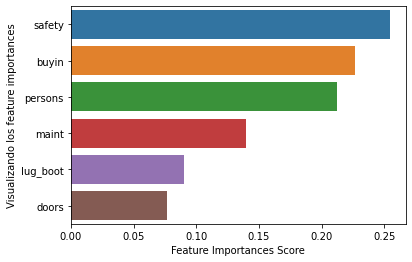

In [180]:
#Grafico de barras
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=features_scores, y=features_scores.index)
plt.xlabel('Feature Importances Score')
plt.ylabel('Visualizando los feature importances');


In [183]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_rf)
print('Matriz de confusion:\n\n',cm)

Matriz de confusion:

 [[ 94   4  19   1]
 [ 11   7   0   1]
 [ 10   0 348   0]
 [ 12   1   0  11]]


array([[265,   0,   1,   0],
       [  1,  49,   0,   0],
       [  3,   0, 849,   0],
       [  1,   0,   1,  39]])

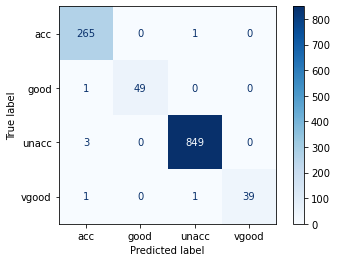

In [186]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(
    y_true=y_train, # Y en train
    y_pred=y_train_pred_rf, # Y predicho en train.
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.confusion_matrix

In [184]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.74      0.80      0.77       118
        good       0.58      0.37      0.45        19
       unacc       0.95      0.97      0.96       358
       vgood       0.85      0.46      0.59        24

    accuracy                           0.89       519
   macro avg       0.78      0.65      0.69       519
weighted avg       0.88      0.89      0.88       519

